---
title: PA 6.2
author: Sujanya Srinath
format:
    html:
        toc: true
        code-fold: true
theme: morph
embed-resources: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [20]:
# Code Here
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line, geom_point, ggtitle, xlab, ylab, theme_minimal, geom_ribbon, theme, element_text
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [21]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()

In [22]:
penguins.dropna(inplace=True)

In [23]:
cat_vars = ['species', 'island', 'sex']
penguins_dummified = pd.get_dummies(penguins, columns=cat_vars, drop_first=True)
X = penguins_dummified.drop(columns=['bill_depth_mm'])
y = penguins_dummified['bill_depth_mm']

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [24]:
# Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = {
    "Model 1: All predictors": X_train.columns,
    "Model 2: Bill length only": ['bill_length_mm'],
    "Model 3: Body mass only": ['body_mass_g'],
    "Model 4: Bill length + Flipper length": ['bill_length_mm', 'flipper_length_mm']
}



In [25]:
results = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

In [26]:
#asked chatgpt for syntax
for name, features in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])

    pipeline.fit(X_train[features], y_train)

    y_train_pred = pipeline.predict(X_train[features])
    y_test_pred = pipeline.predict(X_test[features])

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results = pd.concat([results, pd.DataFrame({
        'Model': [name],
        'Train MSE': [train_mse],
        'Test MSE': [test_mse],
        'Train R2': [train_r2],
        'Test R2': [test_r2]
    })], ignore_index=True)

print(results)


                                   Model  Train MSE  Test MSE  Train R2  \
0                Model 1: All predictors   0.536342  0.812552  0.860970   
1              Model 2: Bill length only   3.651903  3.732114  0.053360   
2                Model 3: Body mass only   2.968681  3.131839  0.230463   
3  Model 4: Bill length + Flipper length   2.290034  2.850048  0.406381   

    Test R2  
0  0.783941  
1  0.007627  
2  0.167241  
3  0.242169  


<ipython-input-26-4ad9351c95dc>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [27]:
results_long = pd.melt(results, id_vars=['Model'], value_vars=['Train R2', 'Test R2'], var_name='Data Split', value_name='R2 Score')

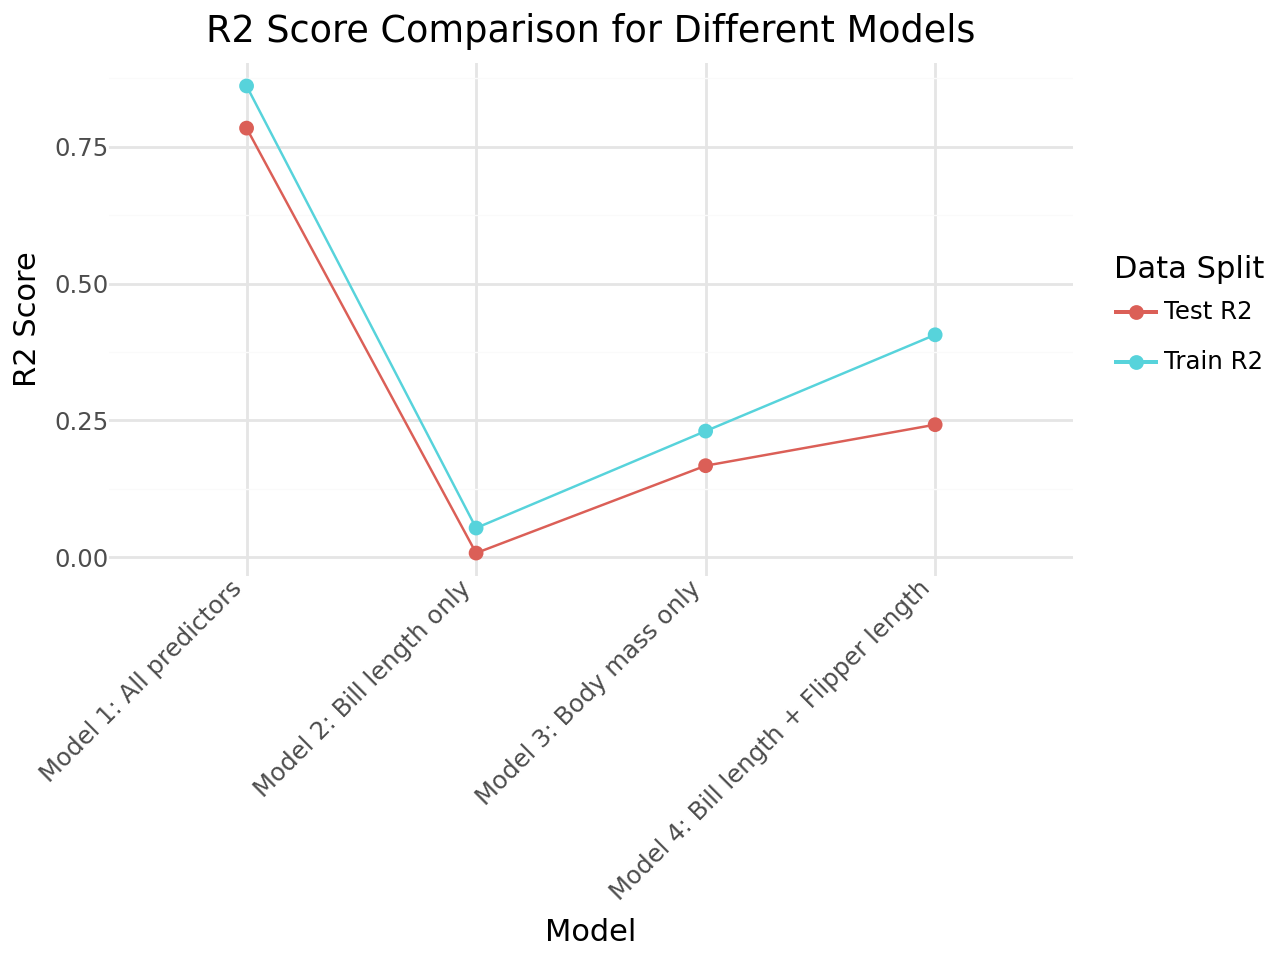

In [31]:
#plotting R^2

(
    ggplot(results_long, aes(x='Model', y='R2 Score', color='Data Split', group='Data Split')) +
    geom_point(size=2) +
    geom_line() +
    ggtitle('R2 Score Comparison for Different Models') +
    xlab('Model') +
    ylab('R2 Score') +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)
